<a href="https://colab.research.google.com/github/yoonsongg/Project/blob/main/try6_seoul_classification_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터출처 : https://data.si.re.kr/node/65072

어떤 평가지표를 선택 할 것인가 : https://gggggeun.tistory.com/18
(Roc-AUC)


In [164]:
url = '/content/drive/MyDrive/AI_Bootcamp/Section2_Project_data/try6/서울서베이 도시정책지표조사 정보(2020년)/6. 2020 서울서베이 가구원(원시자료와 부호화 지침서).xlsx'

In [165]:
import pandas as pd
import numpy as np

In [166]:
df = pd.read_excel(url, sheet_name = 0)
#df_codebook = pd.read_excel(url, sheet_name = 1)

In [167]:
#duplicate df
df_visual = df

In [168]:
df.shape
# df.head(10)
# df.describe()

(40085, 181)

In [169]:
df.head()

,date,ID,GU,NUM_1,FAM15,HOUSE,LIFE,SQ1_1,SQ1_2,SQ1_3,SQ1_4,SQ1_5,SQ1_6,SQ1_7,SQ1_8A,AQ1A1,AQ1A2,AQ1A3,AQ1A4,AQ2A1,AQ2A2,AQ2A3,AQ2A4,AQ2A5,AQ3,AQ4,AQ5A1,AQ5A2,AQ5A3,AQ5A4,AQ6A1,AQ6A2,AQ6A3,AQ6B1,AQ6B2,AQ6B3,AQ7A1,AQ7A2,AQ7A3,AQ7A4,...,AQ28B4,AQ28B5,AQ28C1,AQ28C2,AQ28C3,AQ28C4,AQ28C5,AQ29A1,AQ29A2,AQ29A3,AQ29A4,AQ30A1,AQ30A2,AQ30A3,AQ30A4,AQ30A5,AQ31A1,AQ31A2,AQ31A3,AQ31A4,AQ31A5,APQ1A5,ADQ1,ADQ1A,ADQ2A_1,ADQ2A_2,ADQ2B_1,ADQ2B_2,ADQ3,ADQ3_1,ADQ3_1_1A,ADQ3_1_1B,ADQ3_2A1,ADQ3_2A2,ADQ3_3A1,ADQ3_3A2,ADQ3_4,ADQ3_5,wtb1,wtb2
0,20210326,2,110,4,4,1,1,1,1,1960,1,2,1,2,1,4,3,3,4,4,4,5,4,3,4,3,4,4,5,4,3,3,1,2.0,5.0,NaN,3,3,2,3,...,1,1,1,1,1,1,1,4,3,2,2,4.0,3.0,4.0,3.0,4.0,9,7,8,7,7,7,4,1.0,42,0,5,0,4,5.0,NaN,NaN,45.0,0.0,24.0,0.0,3.0,12.0,132.430909,0.654254
1,20210326,2,110,4,4,1,1,2,2,1962,1,2,1,2,1,4,2,5,4,4,5,4,4,4,4,2,4,5,4,4,3,3,3,4.0,4.0,4.0,3,5,3,3,...,2,2,1,2,1,2,2,3,4,3,4,3.0,4.0,3.0,4.0,3.0,8,9,8,8,8,7,5,1.0,36,0,5,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.597160,0.729181
2,20210326,2,110,4,4,1,1,3,2,1995,2,2,1,2,1,3,4,3,4,4,3,4,3,4,3,3,4,3,4,4,3,2,2,7.0,NaN,NaN,4,3,4,4,...,1,1,1,2,1,2,2,3,2,3,4,3.0,4.0,NaN,3.0,4.0,8,8,9,7,7,7,6,2.0,25,0,5,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129.599108,0.640264
3,20210326,3,110,5,4,1,3,1,1,1983,1,1,1,2,1,4,3,4,4,3,4,3,4,4,4,3,4,4,4,4,3,2,1,2.0,NaN,NaN,3,5,4,3,...,1,1,1,2,1,2,2,3,4,3,3,3.0,4.0,3.0,4.0,3.0,8,7,7,9,7,6,5,1.0,37,0,4,0,7,1.0,1.0,2.0,45.0,0.0,7.0,0.0,3.0,8.0,174.191311,0.860565
4,20210326,3,110,5,4,1,3,2,2,1981,1,1,1,2,1,5,3,4,3,4,4,3,3,4,4,3,4,5,4,4,3,2,2,4.0,NaN,NaN,4,3,4,4,...,2,2,1,1,2,2,2,4,3,4,3,4.0,3.0,3.0,4.0,3.0,8,8,8,7,8,7,6,1.0,12,0,4,0,5,1.0,1.0,1.0,45.0,0.0,7.0,0.0,4.0,7.0,176.356011,0.871259


#data featuring
1. 문항 평균으로 합치기
2. 따라오는 문항 처리 

In [170]:
#categorizing 
#1) Eco 환경
df['Eco_1'] = df[['AQ1A1', 'AQ1A2','AQ1A3','AQ1A4']].mean(axis = 1)
df['Eco_2'] = df[['AQ2A1', 'AQ2A2', 'AQ2A3','AQ2A4', 'AQ2A5']].mean(axis = 1)
df['Eco_3'] = df['AQ3']
df['Eco_4'] = df['AQ4']

In [171]:
#2) life 주거와 생활
df['life_5'] = df[['AQ5A1', 'AQ5A2','AQ5A3','AQ5A4']].mean(axis = 1)
df['life_6_1'] = df['AQ6A1']
condition = df['AQ6A1'] == 3
df.loc[condition, 'life_6_1'] = df['AQ6B1'] + 2
df['life_6_2'] = df['AQ6A2']
condition2 = df['AQ6A2'] == 3
df.loc[condition2, 'life_6_2'] = df['AQ6B2'] + 2
df['life_6_3'] = df['AQ6A3']
condition3 = df['AQ6A3'] == 3
df.loc[condition3, 'life_6_3'] = df['AQ6B3'] + 2

In [172]:
#3)Security 안전
df['security_7'] = df[['AQ7A1', 'AQ7A2','AQ7A3', 'AQ7A4', 'AQ7A5', 'AQ7A6', 'AQ7A7', 'AQ7A8', 'AQ7A9', 'AQ7A10', 'AQ7A11', 'AQ7A12']].mean(axis = 1)

In [173]:
#4) Transportation
df['transportation_8'] = df[['AQ8A1', 'AQ8A2', 'AQ8A3']].mean(axis = 1)
df['transportation_9'] = df[['AQ9A1', 'AQ9A2', 'AQ9A3']].mean(axis = 1)
#문항10번은 통근시간으로 대체(minutes)
df[['AQ10_3A1', 'AQ10_3A2']] = df[['AQ10_3A1', 'AQ10_3A2']].fillna(0)
df['transportation_10'] = df['AQ10_3A1']  + (df['AQ10_3A2'] / 60)

In [174]:
#5) freetime
df['freetime_11'] = df['AQ11']
df['freetime_12_1'] = df[['AQ12A1', 'AQ12A2','AQ12A3','AQ12A4','AQ12A5','AQ12A6','AQ12A7', 'AQ12A8']].sum(axis = 1)
df['freetime_12_2'] = df[['AQ12B1', 'AQ12B2', 'AQ12B3', 'AQ12B4', 'AQ12B5', 'AQ12B6', 'AQ12B7', 'AQ12B8']].sum(axis = 1)
#현재여가1,2순위 평일
df['freetime_13_1'] = df['AQ13_1A1']
df['freetime_13_2'] = df['AQ13_1A2']
#현재여가 1, 2 순위 주말
df['freetime_13_3'] = df['AQ13_2A1']
df['freetime_13_4'] = df['AQ13_2A2']
#희망여가 삭제
df['freetime_14'] = df['AQ14']
df['freetime_15'] = df['AQ15']

In [175]:
#6)health / 16번 원인 삭제 
df['health_16'] = df['AQ16']
df['health_17'] = df['AQ17A1'] + (df['AQ17A2'] / 60)

In [176]:
#7)social
condition4 = (df['AQ18'] == 1)
df['social_18'] = 2
df.loc[condition4, 'social_18'] = df[['AQ18_1A1',	'AQ18_1A2',	'AQ18_1A3',	'AQ18_1A4',	'AQ18_1A5',	'AQ18_1A6',	'AQ18_1A7']].fillna(0).sum(axis = 1)
df['social_19'] = 0
condition5 = df['AQ19A1'] != 8
df.loc[condition5, 'social_19'] = 1

In [177]:
#8)retirement- 노후 생활자금 '방법' 삭제
df['retirement_20'] = df['AQ20']
df['retirement_21'] = df['AQ21']
df['retirement_22'] = df['AQ22']

In [178]:
#9)integration (도움 받을 사람 있다/없다)
df['integration_23'] = df['AQ23']
#가족친구이웃
df['integration_24_1'] = df[['AQ24A1',	'AQ24A2',	'AQ24A3']].mean(axis = 1)
#처음만난낯선사람 국내거주외국인 공공기관
df['integration_24_2'] = df[['AQ24A4',	'AQ24A5',	'AQ24A6']].mean(axis = 1)
df['integration_25'] = df['AQ25']
df['integration_26'] = df['AQ26']
df['integration_27_1'] = df['AQ27A1']
df['integration_27_2'] = df['AQ27A2']
df['integration_28'] = df[['AQ28A1',	'AQ28A2',	'AQ28A3',	'AQ28A4',	'AQ28A5',	'AQ28B1',	'AQ28B2',	'AQ28B3',	'AQ28B4',	'AQ28B5',	'AQ28C1',	'AQ28C2',	'AQ28C3',	'AQ28C4',	'AQ28C5']].mean(axis = 1)
df['integration_29'] = df[['AQ29A1',	'AQ29A2',	'AQ29A3',	'AQ29A4']].mean(axis = 1)
df['integration_30'] = df[['AQ30A1',	'AQ30A2',	'AQ30A3',	'AQ30A4',	'AQ30A5' ]].mean(axis = 1)


In [179]:
df['SQ1_3'] = 2021 - df['SQ1_3']
df.rename(columns = {'SQ1_3' : 'Age', 'SQ1_2' : 'gender', 'SQ1_4' : 'marriage', 'SQ1_5' : 'religion','SQ1_6' : 'Nationality', 'SQ1_7' : 'Disability'}, inplace = True)

In [180]:
df['living'] = df['ADQ2A_1'] + (df['ADQ2A_2'] / 60)

In [181]:
df['happiness'] = df[['AQ31A1',	'AQ31A2',	'AQ31A3',	'AQ31A4',	'AQ31A5',	'APQ1A5']].mean(axis = 1)

In [182]:
#drop feature date(자료공개일), ID(가구주-가구원 수), NUM_1(전체가구원수), FAM15(만15세이상 가구원수), SQ1_8A(면접여부)
df.drop(['date','ID', 'GU','NUM_1','FAM15','SQ1_8A'], axis = 1, inplace = True)

In [183]:
df.drop(['AQ1A1', 'AQ1A2','AQ1A3','AQ1A4','AQ2A1', 'AQ2A2', 'AQ2A3','AQ2A4', 'AQ2A5','AQ3','AQ4',
'AQ5A1', 'AQ5A2','AQ5A3', 'AQ5A4', 'AQ6A1', 'AQ6A2', 'AQ6A3', 'AQ6B1', 'AQ6B2', 'AQ6B3',
'AQ7A1', 'AQ7A2','AQ7A3', 'AQ7A4', 'AQ7A5', 'AQ7A6', 'AQ7A7', 'AQ7A8', 'AQ7A9', 'AQ7A10', 'AQ7A11', 'AQ7A12',
'AQ8A1', 'AQ8A2', 'AQ8A3','AQ9A1', 'AQ9A2', 'AQ9A3','AQ10', 'AQ10_1', 'AQ10_1A', 'AQ10_2',	'AQ10_3A1'	,'AQ10_3A2',
'AQ10_4', 'AQ11', 'AQ12A1', 'AQ12A2','AQ12A3','AQ12A4','AQ12A5','AQ12A6','AQ12A7', 'AQ12A8','AQ12B1', 'AQ12B2', 'AQ12B3', 'AQ12B4', 'AQ12B5', 'AQ12B6', 'AQ12B7', 'AQ12B8',
'AQ13_1A1','AQ13_1A2',	'AQ13_2A1',	'AQ13_2A2',	'AQ13_1B1',	'AQ13_1B2',	'AQ13_2B1',	'AQ13_2B2','AQ14', 'AQ15',
'AQ16','AQ16_1A1',	'AQ16_1A2',	'AQ17A1',	'AQ17A2',
'AQ18', 'AQ18_1A1','AQ18_1A2',	'AQ18_1A3',	'AQ18_1A4',	'AQ18_1A5',	'AQ18_1A6',	'AQ18_1A7',	'AQ19A1'	,'AQ19A2',	'AQ19A3',	'AQ19A4',	'AQ19A5',	'AQ19A6',	'AQ19A7',
'AQ20','AQ20_1A1',	'AQ20_1A2',	'AQ20_1A3',	'AQ20_1A4',	'AQ20_1A5',	'AQ20_1A6',	'AQ21',	'AQ22',	'AQ22A',
'AQ23', 'AQ24A1',	'AQ24A2',	'AQ24A3', 'AQ24A4',	'AQ24A5',	'AQ24A6',
'AQ23A',	'AQ23_1A1',	'AQ23_1A2',	'AQ23_1A3',	'AQ25',	'AQ26',	'AQ27A1',	'AQ27A2',	'AQ28A1',	'AQ28A2',	'AQ28A3',	'AQ28A4',	'AQ28A5',	'AQ28B1',	'AQ28B2',	'AQ28B3',	'AQ28B4',	'AQ28B5',	'AQ28C1',	'AQ28C2',	'AQ28C3',	'AQ28C4',	'AQ28C5',	'AQ29A1',	'AQ29A2',	'AQ29A3',	'AQ29A4',
'AQ31A1',	'AQ31A2',	'AQ31A3',	'AQ31A4',	'AQ31A5',	'APQ1A5',
'SQ1_1','AQ30A1',	'AQ30A2',	'AQ30A3',	'AQ30A4',	'AQ30A5',	'ADQ1',	'ADQ1A',	'ADQ2A_1',	'ADQ2A_2',	'ADQ2B_1',	'ADQ2B_2',	'ADQ3',	'ADQ3_1',	'ADQ3_1_1A',	'ADQ3_1_1B',	'ADQ3_2A1',	'ADQ3_2A2',	'ADQ3_3A1',	'ADQ3_3A2',	'ADQ3_4',	'ADQ3_5',	'wtb1',	'wtb2'

], axis = 1 , inplace = True)




In [184]:
df.isnull().sum()

HOUSE                    0
LIFE                     0
gender                   0
Age                      0
marriage                 0
religion                 0
Nationality              0
Disability               0
Eco_1                    0
Eco_2                    0
Eco_3                    0
Eco_4                    0
life_5                   0
life_6_1                 0
life_6_2                 0
life_6_3                 0
security_7               0
transportation_8       173
transportation_9         0
transportation_10        0
freetime_11              0
freetime_12_1            0
freetime_12_2            0
freetime_13_1            0
freetime_13_2        12888
freetime_13_3            0
freetime_13_4         8786
freetime_14              0
freetime_15              0
health_16                0
health_17                0
social_18                0
social_19                0
retirement_20            0
retirement_21            0
retirement_22            0
integration_23           0
i

In [185]:
#여분의 df
df_1 = df.copy()

In [186]:
df = round(df, 2)
df.head()


,HOUSE,LIFE,gender,Age,marriage,religion,Nationality,Disability,Eco_1,Eco_2,Eco_3,Eco_4,life_5,life_6_1,life_6_2,life_6_3,security_7,transportation_8,transportation_9,transportation_10,freetime_11,freetime_12_1,freetime_12_2,freetime_13_1,freetime_13_2,freetime_13_3,freetime_13_4,freetime_14,freetime_15,health_16,health_17,social_18,social_19,retirement_20,retirement_21,retirement_22,integration_23,integration_24_1,integration_24_2,integration_25,integration_26,integration_27_1,integration_27_2,integration_28,integration_29,integration_30,living,happiness
0,1,1,1,61,1,2,1,2,3.50,4.0,4,3,4.25,4.0,7.0,1.0,3.42,3.00,4.00,0.20,4,0,0.0,1,NaN,5,1.0,5,4,2,9.0,2.0,0,1,6,5,1,3.00,2.67,2,3,6,3.0,1.0,2.75,3.6,42.0,7.50
1,1,1,2,59,1,2,1,2,3.75,4.2,4,2,4.25,6.0,6.0,6.0,3.42,3.67,3.67,0.00,4,5,180000.0,1,5.0,8,6.0,3,4,2,9.0,2.0,0,1,6,8,1,3.67,3.00,2,3,6,3.0,1.4,3.50,3.4,36.0,8.00
2,1,1,2,26,2,2,1,2,3.50,3.6,3,3,3.75,9.0,2.0,2.0,3.67,3.67,4.33,0.08,4,21,600000.0,7,1.0,6,8.0,3,3,2,9.0,2.0,0,1,7,8,1,3.00,2.33,2,2,3,5.0,1.2,3.00,3.5,25.0,7.67
3,1,3,1,38,1,1,1,2,3.75,3.6,4,3,4.00,4.0,2.0,1.0,3.33,3.67,4.00,0.17,4,3,30000.0,1,7.0,7,10.0,2,4,4,9.0,2.0,0,1,7,5,1,3.67,2.33,3,3,5,6.0,1.2,3.25,3.4,37.0,7.33
4,1,3,2,40,1,1,1,2,3.75,3.6,4,3,4.25,6.0,2.0,2.0,3.67,4.33,4.33,0.67,4,0,0.0,1,10.0,5,8.0,2,3,3,9.0,2.0,0,1,5,3,1,3.00,2.67,3,3,3,6.0,1.4,3.50,3.4,12.0,7.67


In [187]:
#classification (mean 기준)

base = df['happiness'].mean()
df['happiness_class'] = df['happiness'] >= base
df['happiness_class'].unique()
base

6.596016465011949

In [188]:
#baseline (classification)
baseline = df['happiness_class'].value_counts(normalize = True)[1]
baseline

0.5639765498316078

In [189]:
df['happiness_class'].value_counts(normalize = True)

True     0.563977
False    0.436023
Name: happiness_class, dtype: float64

In [190]:
#여가 13-2, 13-4 2순위 선택 삭제 
df.drop(['freetime_13_2', 'freetime_13_4', 'happiness'], axis = 1, inplace = True)

In [191]:
target = 'happiness_class'
features = [col for col in df.columns if col != target]

In [192]:
df.shape

(40085, 46)

# 모델 1) 선형회귀

4) 머신러닝 방식 적용 및 교차검증
데이터의 탐색과 전처리 작업이 끝났다면 모델링을 통해 베이스라인과의 성능 비교를 해봅니다.

Linear / Tree-based / Ensemble 모델을 학습하세요. (다양하게 시도해보시는 걸 추천합니다.)

평가지표를 계산 후 베이스라인과 비교해보세요.

어느정도 성능이 나왔다면, 교차 검증 (이하 CV)을 통해서 일반화될 가능성이 있는지 확인해봅니다.

모델 성능을 개선하기 위한 다양한 방법을 적용해보세요.

Hyperparameter tuning, etc.
최소 2개 이상의 모델을 만들어서 validation 점수를 보고하세요.

최종 모델의 test 점수를 보고하세요.

태스크를 수행한 후, 다음 질문에 대답할 수 있어야 합니다.
1.모델을 학습한 후에 베이스라인보다 잘 나왔나요? 그렇지 않다면 그 이유는 무엇일까요?
2.모델 성능 개선을 위해 어떤 방법을 적용했나요? 그 방법을 선택한 이유는 무엇인가요?
3.최종 모델에 관해 설명하세요.


In [193]:
!pip install category_encoders

In [194]:
from category_encoders import TargetEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [195]:
#train_test_set split

train, test = train_test_split(df, test_size = 0.2, random_state = 2)
train, val = train_test_split(train, test_size = 0.2, random_state = 2)

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

X_train.shape ,  X_val.shape,  X_test.shape

((25654, 45), (6414, 45), (8017, 45))

In [196]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score

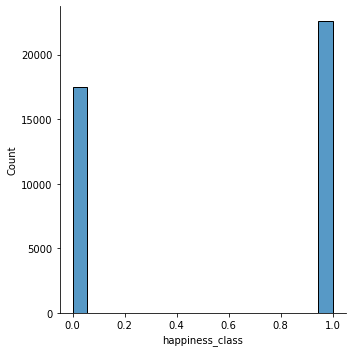

In [197]:
sns.displot(df[target])
#negatively skewed / left-skewed

In [198]:
#일반적으로 skewness 값이 -2 ~ +2 치우침이 없다고 판단
df[target].skew()

-0.25803678155845866

In [199]:
#logit 변환 하지 않음 
#1) RandomForestClassifier

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    #StandardScaler(),
    RandomForestClassifier(n_estimators = 100, random_state=2, n_jobs = -1)
)


pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_val)
print('검증정확도 :' , pipe.score(X_val, y_val))
print('roc_auc_score :', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

검증정확도 : 0.7926410975990021
roc_auc_score : 0.786296377788168
              precision    recall  f1-score   support

       False       0.80      0.72      0.76      2884
        True       0.79      0.85      0.82      3530

    accuracy                           0.79      6414
   macro avg       0.79      0.79      0.79      6414
weighted avg       0.79      0.79      0.79      6414



In [200]:
#logit 변환 하지 않음 
#1) RandomForestClassifier (hyperparameter 'n_estimators': 300, 'min_samples_leaf': 10, 'max_depth': 7)

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    #StandardScaler(),
    RandomForestClassifier(n_estimators = 300,  max_depth = 7, min_samples_leaf = 10, random_state=2, n_jobs = -1)
)


pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_val)
print('검증정확도 :' , pipe.score(X_val, y_val))
print('roc_auc_score :', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

검증정확도 : 0.7536638603055815
roc_auc_score : 0.7386388907442841
              precision    recall  f1-score   support

       False       0.81      0.59      0.68      2884
        True       0.73      0.89      0.80      3530

    accuracy                           0.75      6414
   macro avg       0.77      0.74      0.74      6414
weighted avg       0.76      0.75      0.75      6414



In [201]:
# #1-1) randomforestclassifier hyperparameter 조정

# from sklearn.model_selection import RandomizedSearchCV


# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
# X_val_encoded = encoder.transform(X_val) # 검증데이터

# imputer = SimpleImputer(strategy = 'most_frequent')
# X_train_imputed = imputer.fit_transform(X_train_encoded)
# X_val_imputed = imputer.transform(X_val_encoded)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_imputed)
# X_val_scaled = scaler.fit_transform(X_val_imputed)

# X_test_encoded = encoder.transform(X_test)
# X_test_imputed = imputer.transform(X_test_encoded)
# X_test_scaled = scaler.transform(X_test_imputed)

# rf = RandomForestClassifier( random_state= 2)

# dists = {
#     'n_estimators' : [100, 200, 300],
#     'max_depth' : list(range(2, 8)),
#     'min_samples_leaf' : [10, 20, 30, 50]
# }

# clf = RandomizedSearchCV(

#     estimator = rf,
#     param_distributions = dists,
#     n_iter = 50,
#     cv = 3,
#     scoring = 'roc_auc',
#     n_jobs = -1
# )

# clf.fit(X_train_scaled, y_train)

# print('최적 하이퍼 파라미터:', clf.best_params_)

In [202]:
### 모델 선택 !! 
#2) xgboost

pipe_final = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_final.fit(X_train, y_train)

y_pred = pipe_final.predict(X_val)
y_pred_test = pipe_final.predict(X_test)
print('검증정확도 :' , pipe_final.score(X_val, y_val))
print('roc_auc_score :', roc_auc_score(y_val, y_pred))
print('test_set_roc_auc_score :' , roc_auc_score(y_test, y_pred_test))
#print(classification_report(y_val, y_pred))
print(classification_report(y_test, y_pred_test))

검증정확도 : 0.7956033676333022
roc_auc_score : 0.7900345954823526
test_set_roc_auc_score : 0.7878281822273204
              precision    recall  f1-score   support

       False       0.78      0.74      0.76      3529
        True       0.80      0.84      0.82      4488

    accuracy                           0.79      8017
   macro avg       0.79      0.79      0.79      8017
weighted avg       0.79      0.79      0.79      8017



In [203]:
#2) xgboost (hyperparameter)

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=2
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_val)

print('검증정확도 :' , pipe.score(X_val, y_val))
print('roc_auc_score :', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

검증정확도 : 0.7695665731212972
roc_auc_score : 0.7616528428803244
              precision    recall  f1-score   support

       False       0.78      0.68      0.73      2884
        True       0.76      0.84      0.80      3530

    accuracy                           0.77      6414
   macro avg       0.77      0.76      0.76      6414
weighted avg       0.77      0.77      0.77      6414



In [204]:
# #2-1) XGboost hyperparameter 조정

# from sklearn.model_selection import RandomizedSearchCV

# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
# X_val_encoded = encoder.transform(X_val) # 검증데이터

# imputer = SimpleImputer(strategy = 'most_frequent')
# X_train_imputed = imputer.fit_transform(X_train_encoded)
# X_val_imputed = imputer.transform(X_val_encoded)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_imputed)
# X_val_scaled = scaler.fit_transform(X_val_imputed)

# X_test_encoded = encoder.transform(X_test)
# X_test_imputed = imputer.transform(X_test_encoded)
# X_test_scaled = scaler.transform(X_test_imputed)

# xgb = XGBClassifier(n_estimators= 200, random_state= 2)

# dists = {
#     'learning_rate' : [0.1, 0.2, 0.5],
#     'max_dapth' : list(range(2, 8))
# }

# clf = RandomizedSearchCV(
#     estimator = xgb,
#     param_distributions = dists,
#     n_iter = 50,
#     cv = 3,
#     scoring = 'roc_auc',
#     n_jobs = -1
# )

# clf.fit(X_train_scaled, y_train)

# print('최적 하이퍼 파라미터:', clf.best_params_)

#Model Selection / Feature Selection / 

In [205]:
#모델선택 !! 
#feature importances 

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.2,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=-1, nthread

In [206]:
pipe.named_steps

{'ordinalencoder': OrdinalEncoder(cols=[], drop_invariant=False, handle_missing='value',
                handle_unknown='value', mapping=[], return_df=True, verbose=0),
 'simpleimputer': SimpleImputer(add_indicator=False, copy=True, fill_value=None,
               missing_values=nan, strategy='mean', verbose=0),
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'xgbclassifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.2, max_delta_step=0, max_depth=7,
               min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=2,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1)}

In [207]:
!pip install eli5

In [208]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['xgbclassifier'],
    scoring = 'roc_auc',
    n_iter = 5,
    random_state = 2
)
permuter.fit(X_val_scaled, y_val)


PermutationImportance(cv='prefit',
                      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              learning_rate=0.2,
                                              max_delta_step=0, max_depth=7,
                                              min_child_weight=1, missing=None,
                                              n_estimators=200, n_jobs=-1,
                                              nthread=None,
                                              objective='binary:logistic',
                                              random_state=2, reg_alpha=0,
                                              reg_lambda=1, scale_pos_weight=1,
                                              seed=None, silent=None,
                    

In [209]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

Nationality         -0.000008
marriage             0.000004
gender               0.000144
Disability           0.000185
social_18            0.000225
HOUSE                0.000740
religion             0.000922
social_19            0.001078
integration_27_2     0.001384
Eco_4                0.001696
freetime_11          0.001853
Eco_3                0.001943
retirement_22        0.001943
LIFE                 0.002177
integration_24_2     0.002629
Eco_2                0.002673
freetime_14          0.002724
integration_27_1     0.002832
freetime_13_1        0.003081
life_6_3             0.003187
life_6_1             0.003359
Eco_1                0.003451
integration_26       0.003761
transportation_8     0.004015
freetime_12_1        0.004215
freetime_13_3        0.004701
life_6_2             0.004769
integration_29       0.004963
freetime_12_2        0.005203
retirement_20        0.005419
transportation_10    0.005503
integration_28       0.006105
transportation_9     0.006531
living    

In [210]:
eli5.show_weights(
    permuter,
    top = 46,
    feature_names = feature_names
)

Weight,Feature
0.0219 ± 0.0023,integration_30
0.0200 ± 0.0033,Age
0.0162 ± 0.0023,health_16
0.0160 ± 0.0043,integration_24_1
0.0098 ± 0.0009,health_17
0.0090 ± 0.0019,integration_25
0.0076 ± 0.0022,retirement_21
0.0076 ± 0.0017,integration_23
0.0075 ± 0.0020,security_7
0.0073 ± 0.0010,life_5


In [211]:
#Feature selection
minimum_importance = 0.008
mask = permuter.feature_importances_ > minimum_importance

features_2 = X_train.columns[mask]

X_train_selected = X_train[features_2]
X_val_selected = X_val[features_2]
X_test_selected = X_test[features_2]

X_train.shape, X_train_selected.shape

((25654, 45), (25654, 6))

In [212]:
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)    
pipe.fit(X_train_selected, y_train)

y_pred = pipe.predict(X_val_selected)

print('검증정확도 :' , pipe.score(X_val_selected, y_val))
print('roc_auc_score :', roc_auc_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

# .. 근데 더 떨어짐... Feature selection 안하기로 . 

검증정확도 : 0.7218584346741503
roc_auc_score : 0.7128212507809032
              precision    recall  f1-score   support

       False       0.72      0.62      0.67      2884
        True       0.72      0.80      0.76      3530

    accuracy                           0.72      6414
   macro avg       0.72      0.71      0.71      6414
weighted avg       0.72      0.72      0.72      6414



#5) 머신러닝 모델 해석

프로젝트에서 가장 중요하다고 볼 수 있는 부분 입니다. 우리는 SHAP, PDP 등을 통해서 모델이 관측치를 어떤 특성을 활용했거나, 어떤 특성이 타겟에 영향을 끼쳤는지 등을 해석하는 방법에 대해서 배웠습니다.
여러분의 프로젝트에도 이러한 해석 방법을 활용해 머신러닝 모델을 비전문가라도 조금 더 쉽게 이해하고 접근할 수 있도록 해주셔야 합니다.

PDP, SHAP을 활용하여 최종 모델을 설명합니다
시각화는 "설명"이 제일 중요합니다.

In [213]:
!pip install shap
!pip install pdp
!pip install pdpbox

In [214]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import shap

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5d716d1810>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5e5a1612d0>})

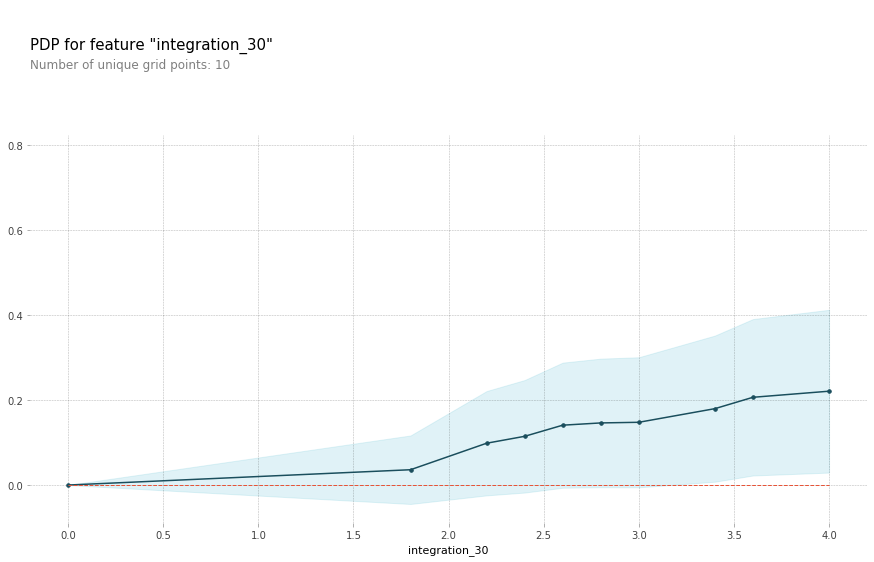

In [215]:
X_val_fill = X_val.fillna(0)
X_train_fill = X_train.fillna(0)


feature = 'integration_30'
boosting = XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
boosting.fit(X_train_fill, y_train)

isolated = pdp_isolate(
    model = boosting,
    dataset = X_val_fill,
    model_features = X_val_fill.columns,
    feature = feature,
    grid_type = 'percentile',
    num_grid_points = 10

)

pdp_plot(isolated, feature_name = feature)



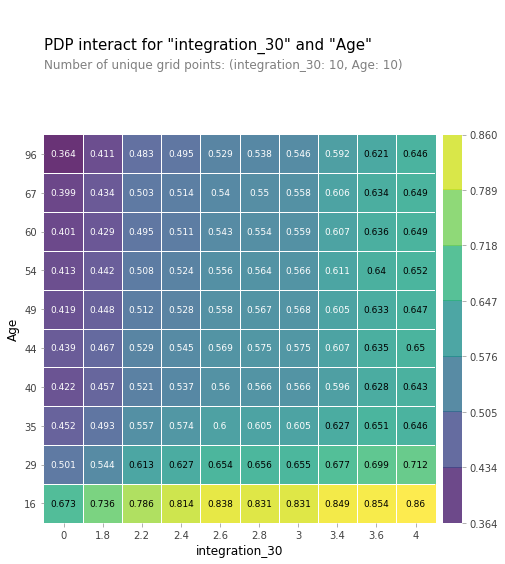

In [216]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['integration_30', 'Age']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_fill,
    model_features=X_val_fill.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

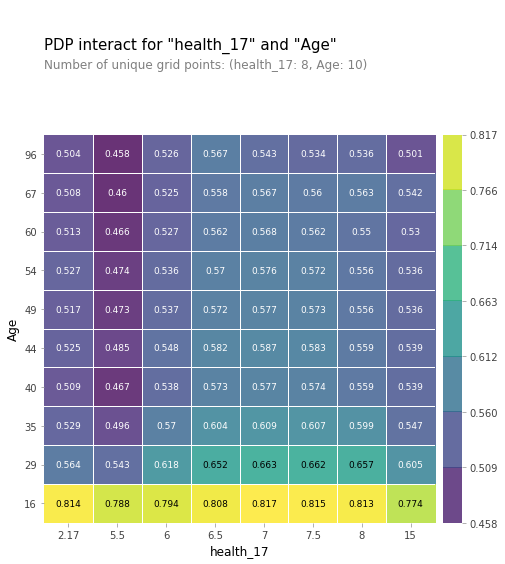

In [217]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['health_17', 'Age']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_fill,
    model_features=X_val_fill.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

In [218]:
X_train_fill_scaled = scaler.fit_transform(X_train_fill)
X_val_fill_scaled = scaler.transform(X_val_fill)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5d6fa15c10>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f5d6f692410>})

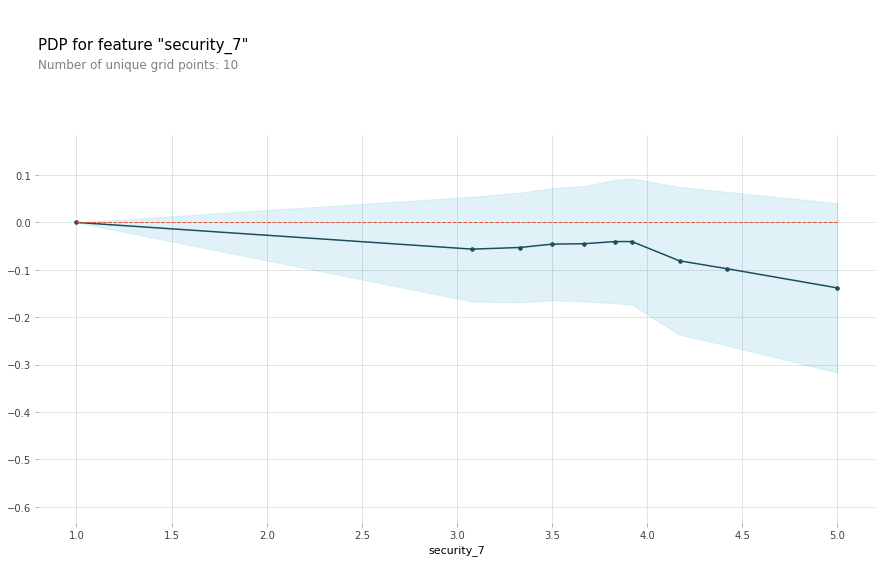

In [219]:
isolated = pdp_isolate(
    model = boosting,
    dataset = X_val_fill,
    model_features = X_val_fill.columns,
    feature = 'security_7',
    # grid_type = 'percentile',
    # num_grid_points = 10

)

pdp_plot(isolated, feature_name = 'security_7')

In [220]:
#Shap
pipe_final = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    StandardScaler(),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe_final.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=[], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[], return_df=True, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.2,
                               max_delta_step=0, max_depth=7,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=-1, nthread

In [221]:
test_condition = (X_test['Age'] >= 30) & (X_test['Age'] < 40)
X_test_30 = X_test.loc[test_condition]

In [222]:
#X_test_30.index
X_test_30.iloc[[2]]

,HOUSE,LIFE,gender,Age,marriage,religion,Nationality,Disability,Eco_1,Eco_2,Eco_3,Eco_4,life_5,life_6_1,life_6_2,life_6_3,security_7,transportation_8,transportation_9,transportation_10,freetime_11,freetime_12_1,freetime_12_2,freetime_13_1,freetime_13_3,freetime_14,freetime_15,health_16,health_17,social_18,social_19,retirement_20,retirement_21,retirement_22,integration_23,integration_24_1,integration_24_2,integration_25,integration_26,integration_27_1,integration_27_2,integration_28,integration_29,integration_30,living
9023,2,2,1,34,2,6,1,2,3.0,2.6,3,3,3.0,5.0,8.0,1.0,2.58,3.33,3.67,0.67,3,0,0.0,7,4,1,3,3,7.0,2.0,0,1,4,4,1,3.67,1.67,3,3,5,1.0,1.47,3.0,2.0,23.0


In [223]:

explainer = shap.TreeExplainer(pipe_final.named_steps['xgbclassifier'])
row_processed = pipe_final.named_steps['ordinalencoder'].transform(row)
shap_values = explainer.shap_values(row_processed)


In [224]:
shap.initjs()
shap_values = explainer.shap_values(X_test_30.iloc[:300])
shap.force_plot(explainer.expected_value, shap_values, X_test_30.iloc[:300])

In [225]:
disability = X_test['Disability'] == 1 
X_test_disability = X_test.loc[disability]
row = X_test_disability.iloc[[7]]
row
#y_test.iloc[[2]]
#X_test_nation.shape (26,45)


,HOUSE,LIFE,gender,Age,marriage,religion,Nationality,Disability,Eco_1,Eco_2,Eco_3,Eco_4,life_5,life_6_1,life_6_2,life_6_3,security_7,transportation_8,transportation_9,transportation_10,freetime_11,freetime_12_1,freetime_12_2,freetime_13_1,freetime_13_3,freetime_14,freetime_15,health_16,health_17,social_18,social_19,retirement_20,retirement_21,retirement_22,integration_23,integration_24_1,integration_24_2,integration_25,integration_26,integration_27_1,integration_27_2,integration_28,integration_29,integration_30,living
36615,4,3,1,62,1,6,1,1,3.0,3.0,3,3,3.0,1.0,1.0,1.0,3.17,3.0,3.0,0.83,3,0,0.0,11,11,1,3,3,8.0,2.0,0,2,4,5,1,3.33,3.0,3,3,1,5.0,1.2,3.0,2.0,40.0


In [226]:
y_test.loc[36615]

False

In [227]:
pipe_final.predict(row)

array([False])

In [228]:
shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_values,
    features = row
)

IndexError: ignored

In [ ]:
feature_names = row.columns
feature_values = row.values[0]
shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))

In [ ]:
pros = shaps.sort_values(ascending= False)[:3].index
cons = shaps.sort_values(ascending = True)[:3].index

In [ ]:
shaps.sort_values(ascending = True)

In [ ]:
print('happiness 예측에 대한 Positive 요인 top3 입니다')
for i, pro in enumerate(pros, start = 1):
    feature_name, feature_value = pro
    print(f'{i}.{feature_name} : {feature_value}')
print('\n')

print('happiness 예측에 대한 Negative 요인 top3 입니다')
for i , con in enumerate(cons, start = 1):
    feature_name, feature_value = con
    print(f'{i}. {feature_name} : {feature_value}')
    